# Import Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score


# Read Data


In [2]:
data_file = pd.read_csv('data/wdbc.data',
                        header=None,
                        names=['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se', 'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'concave_points_worst', 'symmetry_worst', 'fractal_dimension_worst'])

data_file.head()


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave_points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [3]:
def categorical_to_numeric_diagnosis(x):
    if x == 'M':
        return 1
    if x == 'B':
        return 0


In [4]:
data_file['diagnosis'] = data_file['diagnosis'].apply(
    categorical_to_numeric_diagnosis)


In [5]:
data_file.head()


id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave_points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [6]:
print(data_file.info())
data_file.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave_points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

id   diagnosis  radius_mean  texture_mean  perimeter_mean  \
count  5.690000e+02  569.000000   569.000000    569.000000      569.000000   
mean   3.037183e+07    0.372583    14.127292     19.289649       91.969033   
std    1.250206e+08    0.483918     3.524049      4.301036       24.298981   
min    8.670000e+03    0.000000     6.981000      9.710000       43.790000   
25%    8.692180e+05    0.000000    11.700000     16.170000       75.170000   
50%    9.060240e+05    0.000000    13.370000     18.840000       86.240000   
75%    8.813129e+06    1.000000    15.780000     21.800000      104.100000   
max    9.113205e+08    1.000000    28.110000     39.280000      188.500000   

         area_mean  smoothness_mean  compactness_mean  concavity_mean  \
count   569.000000       569.000000        569.000000      569.000000   
mean    654.889104         0.096360          0.104341        0.088799   
std     351.914129         0.014064          0.052813        0.079720   
min     143.500000         0.052630          0.019380        0.000000   
25%     420.300000         0.086370          0.064920        0.029560   
50%     551.100000         0.095870          0.092630        0.061540   
75%     782.700000         0.105300          0.130400        0.130700   
max    2501.000000         0.163400          0.345400        0.426800   

       concave_points_mean  ...  radius_worst  texture_worst  perimeter_worst  \
count           569.000000  ...    569.000000     569.000000       569.000000   
mean              0.048919  ...     16.269190      25.677223       107.261213   
std               0.038803  ...      4.833242       6.146258        33.602542   
min               0.000000  ...      7.930000      12.020000        50.410000   
25%               0.020310  ...     13.010000      21.080000        84.110000   
50%               0.033500  ...     14.970000      25.410000        97.660000   
75%               0.074000  ...     18.790000      29.720000       125.400000   
max               0.201200  ...     36.040000      49.540000       251.200000   

        area_worst  smoothness_worst  compactness_worst  concavity_worst  \
count   569.000000        569.000000         569.000000       569.000000   
mean    880.583128          0.132369           0.254265         0.272188   
std     569.356993          0.022832           0.157336         0.208624   
min     185.200000          0.071170           0.027290         0.000000   
25%     515.300000          0.116600           0.147200         0.114500   
50%     686.500000          0.131300           0.211900         0.226700   
75%    1084.000000          0.146000           0.339100         0.382900   
max    4254.000000          0.222600           1.058000         1.252000   

       concave_points_worst  symmetry_worst  fractal_dimension_worst  
count            569.000000      569.000000               569.000000  
mean               0.114606        0.290076                 0.083946  
std                0.065732        0.061867                 0.018061  
min                0.000000        0.156500                 0.055040  
25%                0.064930        0.250400                 0.071460  
50%                0.099930        0.282200                 0.080040  
75%                0.161400        0.317900                 0.092080  
max                0.291000        0.663800                 0.207500  

[8 rows x 32 columns]

# Exploratory Data Analyis

Play with the data, look for null values, find
correlations between features, use scaling/standardization on data.


# Check For Null Values


In [7]:
cols = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean',
        'compactness_mean', 'concavity_mean', 'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean']


In [8]:
print(data_file.columns[data_file.isnull().any()])
print(data_file.isnull().sum())


Index([], dtype='object')
id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


# Plot correlation heatmap of features


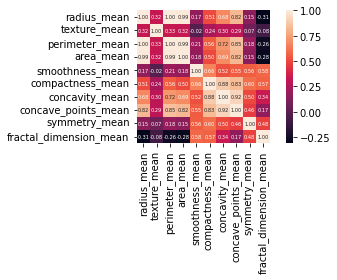

In [9]:
cm = np.corrcoef(data_file[cols].values.T)
hm = sns.heatmap(cm,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 5},
                 yticklabels=cols,
                 xticklabels=cols)

plt.tight_layout()
plt.show()


# Plot class labels, check if there is imbalance


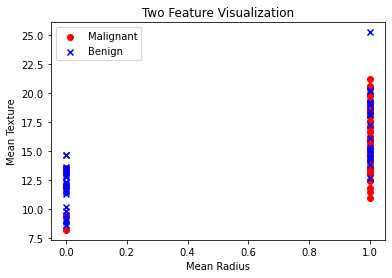

In [10]:
%matplotlib inline

# select outcomes
y = data_file.iloc[:, 0].values

# extract mean radius and texture
X = data_file.iloc[0:100, [1, 2]].values

# plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='Malignant')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='Benign')
plt.title("Two Feature Visualization")
plt.xlabel('Mean Radius')
plt.ylabel('Mean Texture')
plt.legend(loc='upper left')
plt.show()


In [11]:
data_file.diagnosis.value_counts(normalize=True)


0    0.627417
1    0.372583
Name: diagnosis, dtype: float64

In [12]:
# Mapping our target variable to 1 and 0
le = LabelEncoder()
data_file['diagnosis'] = le.fit_transform(data_file['diagnosis'])
data_file.head()


id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave_points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

The figure above shows that the data can be linearly separable by only two features.


# Removing features that are less correlated with our target variable


In [13]:
data_file.shape
data_file.head()


id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave_points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [14]:

data_file.corr().diagnosis[data_file.corr().diagnosis <= 0.2]


id                        0.039769
fractal_dimension_mean   -0.012838
texture_se               -0.008303
smoothness_se            -0.067016
symmetry_se              -0.006522
fractal_dimension_se      0.077972
Name: diagnosis, dtype: float64

In [15]:

less_corr = data_file.corr().diagnosis[data_file.corr().diagnosis <= 0.2].index
data_file = data_file.drop(columns=['fractal_dimension_mean', 'texture_se',
                           'smoothness_se', 'symmetry_se', 'fractal_dimension_se'], axis=1)


In [16]:
data_file.head(30)


id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0     842302          1       17.990         10.38          122.80     1001.0   
1     842517          1       20.570         17.77          132.90     1326.0   
2   84300903          1       19.690         21.25          130.00     1203.0   
3   84348301          1       11.420         20.38           77.58      386.1   
4   84358402          1       20.290         14.34          135.10     1297.0   
5     843786          1       12.450         15.70           82.57      477.1   
6     844359          1       18.250         19.98          119.60     1040.0   
7   84458202          1       13.710         20.83           90.20      577.9   
8     844981          1       13.000         21.82           87.50      519.8   
9   84501001          1       12.460         24.04           83.97      475.9   
10    845636          1       16.020         23.24          102.70      797.8   
11  84610002          1       15.780         17.89          103.60      781.0   
12    846226          1       19.170         24.80          132.40     1123.0   
13    846381          1       15.850         23.95          103.70      782.7   
14  84667401          1       13.730         22.61           93.60      578.3   
15  84799002          1       14.540         27.54           96.73      658.8   
16    848406          1       14.680         20.13           94.74      684.5   
17  84862001          1       16.130         20.68          108.10      798.8   
18    849014          1       19.810         22.15          130.00     1260.0   
19   8510426          0       13.540         14.36           87.46      566.3   
20   8510653          0       13.080         15.71           85.63      520.0   
21   8510824          0        9.504         12.44           60.34      273.9   
22   8511133          1       15.340         14.26          102.50      704.4   
23    851509          1       21.160         23.04          137.20     1404.0   
24    852552          1       16.650         21.38          110.00      904.6   
25    852631          1       17.140         16.40          116.00      912.7   
26    852763          1       14.580         21.53           97.41      644.8   
27    852781          1       18.610         20.25          122.10     1094.0   
28    852973          1       15.300         25.27          102.40      732.4   
29    853201          1       17.570         15.05          115.00      955.1   

    smoothness_mean  compactness_mean  concavity_mean  concave_points_mean  \
0           0.11840           0.27760         0.30010              0.14710   
1           0.08474           0.07864         0.08690              0.07017   
2           0.10960           0.15990         0.19740              0.12790   
3           0.14250           0.28390         0.24140              0.10520   
4           0.10030           0.13280         0.19800              0.10430   
5           0.12780           0.17000         0.15780              0.08089   
6           0.09463           0.10900         0.11270              0.07400   
7           0.11890           0.16450         0.09366              0.05985   
8           0.12730           0.19320         0.18590              0.09353   
9           0.11860           0.23960         0.22730              0.08543   
10          0.08206           0.06669         0.03299              0.03323   
11          0.09710           0.12920         0.09954              0.06606   
12          0.09740           0.24580         0.20650              0.11180   
13          0.08401           0.10020         0.09938              0.05364   
14          0.11310           0.22930         0.21280              0.08025   
15          0.11390           0.15950         0.16390              0.07364   
16          0.09867           0.07200         0.07395              0.05259   
17          0.11700           0.20220         0.17220              0.10280   
18          0.09

# Apply scaling/standardization on features


In [17]:
new_df = data_file.iloc[:, 2:]
new_df[new_df.columns] = StandardScaler().fit_transform(new_df)
new_df.head(5)


radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0     1.097064     -2.073335        1.269934   0.984375         1.568466   
1     1.829821     -0.353632        1.685955   1.908708        -0.826962   
2     1.579888      0.456187        1.566503   1.558884         0.942210   
3    -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4     1.750297     -1.151816        1.776573   1.826229         0.280372   

   compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0          3.283515        2.652874             2.532475       2.217515   
1         -0.487072       -0.023846             0.548144       0.001392   
2          1.052926        1.363478             2.037231       0.939685   
3          3.402909        1.915897             1.451707       2.867383   
4          0.539340        1.371011             1.428493      -0.009560   

   radius_se  ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0   2.489734  ...      1.886690      -1.359293         2.303601    2.001237   
1   0.499255  ...      1.805927      -0.369203         1.535126    1.890489   
2   1.228676  ...      1.511870      -0.023974         1.347475    1.456285   
3   0.326373  ...     -0.281464       0.133984        -0.249939   -0.550021   
4   1.270543  ...      1.298575      -1.466770         1.338539    1.220724   

   smoothness_worst  compactness_worst  concavity_worst  concave_points_worst  \
0          1.307686           2.616665         2.109526              2.296076   
1         -0.375612          -0.430444        -0.146749              1.087084   
2          0.527407           1.082932         0.854974              1.955000   
3          3.394275           3.893397         1.989588              2.175786   
4          0.220556          -0.313395         0.613179              0.729259   

   symmetry_worst  fractal_dimension_worst  
0        2.750622                 1.937015  
1       -0.243890                 0.281190  
2        1.152255                 0.201391  
3        6.046041                 4.935010  
4       -0.868353                -0.397100  

[5 rows x 25 columns]

In [18]:
new_df["id"] = data_file["id"]
new_df["diagnosis"] = data_file["diagnosis"]
new_df


radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0       1.097064     -2.073335        1.269934   0.984375         1.568466   
1       1.829821     -0.353632        1.685955   1.908708        -0.826962   
2       1.579888      0.456187        1.566503   1.558884         0.942210   
3      -0.768909      0.253732       -0.592687  -0.764464         3.283553   
4       1.750297     -1.151816        1.776573   1.826229         0.280372   
..           ...           ...             ...        ...              ...   
564     2.110995      0.721473        2.060786   2.343856         1.041842   
565     1.704854      2.085134        1.615931   1.723842         0.102458   
566     0.702284      2.045574        0.672676   0.577953        -0.840484   
567     1.838341      2.336457        1.982524   1.735218         1.525767   
568    -1.808401      1.221792       -1.814389  -1.347789        -3.112085   

     compactness_mean  concavity_mean  concave_points_mean  symmetry_mean  \
0            3.283515        2.652874             2.532475       2.217515   
1           -0.487072       -0.023846             0.548144       0.001392   
2            1.052926        1.363478             2.037231       0.939685   
3            3.402909        1.915897             1.451707       2.867383   
4            0.539340        1.371011             1.428493      -0.009560   
..                ...             ...                  ...            ...   
564          0.219060        1.947285             2.320965      -0.312589   
565         -0.017833        0.693043             1.263669      -0.217664   
566         -0.038680        0.046588             0.105777      -0.809117   
567          3.272144        3.296944             2.658866       2.137194   
568         -1.150752       -1.114873            -1.261820      -0.820070   

     radius_se  ...  perimeter_worst  area_worst  smoothness_worst  \
0     2.489734  ...         2.303601    2.001237          1.307686   
1     0.499255  ...         1.535126    1.890489         -0.375612   
2     1.228676  ...         1.347475    1.456285          0.527407   
3     0.326373  ...        -0.249939   -0.550021          3.394275   
4     1.270543  ...         1.338539    1.220724          0.220556   
..         ...  ...              ...         ...               ...   
564   2.782080  ...         1.752563    2.015301          0.378365   
565   1.300499  ...         1.421940    1.494959         -0.691230   
566   0.184892  ...         0.579001    0.427906         -0.809587   
567   1.157935  ...         2.303601    1.653171          1.430427   
568  -0.070279  ...        -1.432735   -1.075813         -1.859019   

     compactness_worst  concavity_worst  concave_points_worst  symmetry_worst  \
0             2.616665         2.109526              2.296076        2.750622   
1            -0.430444        -0.146749              1.087084       -0.243890   
2             1.082932         0.854974              1.955000        1.152255   
3             3.893397         1.989588              2.175786        6.046041   
4            -0.313395         0.613179              0.729259       -0.868353   
..                 ...              ...                   ...             ...   
564          -0.273318         0.664512              1.629151       -1.360158   
565          -0.394820         0.236573              0.733827       -0.531855   
566           0.350735         0.326767              0.414069       -1.104549   
567           3.904848         3.197605              2.289985        1.919083   
568          -1.207552        -1.305831             -1.745063       -0.048138   

     fractal_dimension_worst        id  diagnosis  
0                   1.937015    842302          1  
1                   0.281190    842517          1  
2                   0.201391  84300903          1  
3                   4.935010  84348301          1  
4                  -0.397100  84358402          1  
..               

# Pairplots


C:\Users\Asus\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


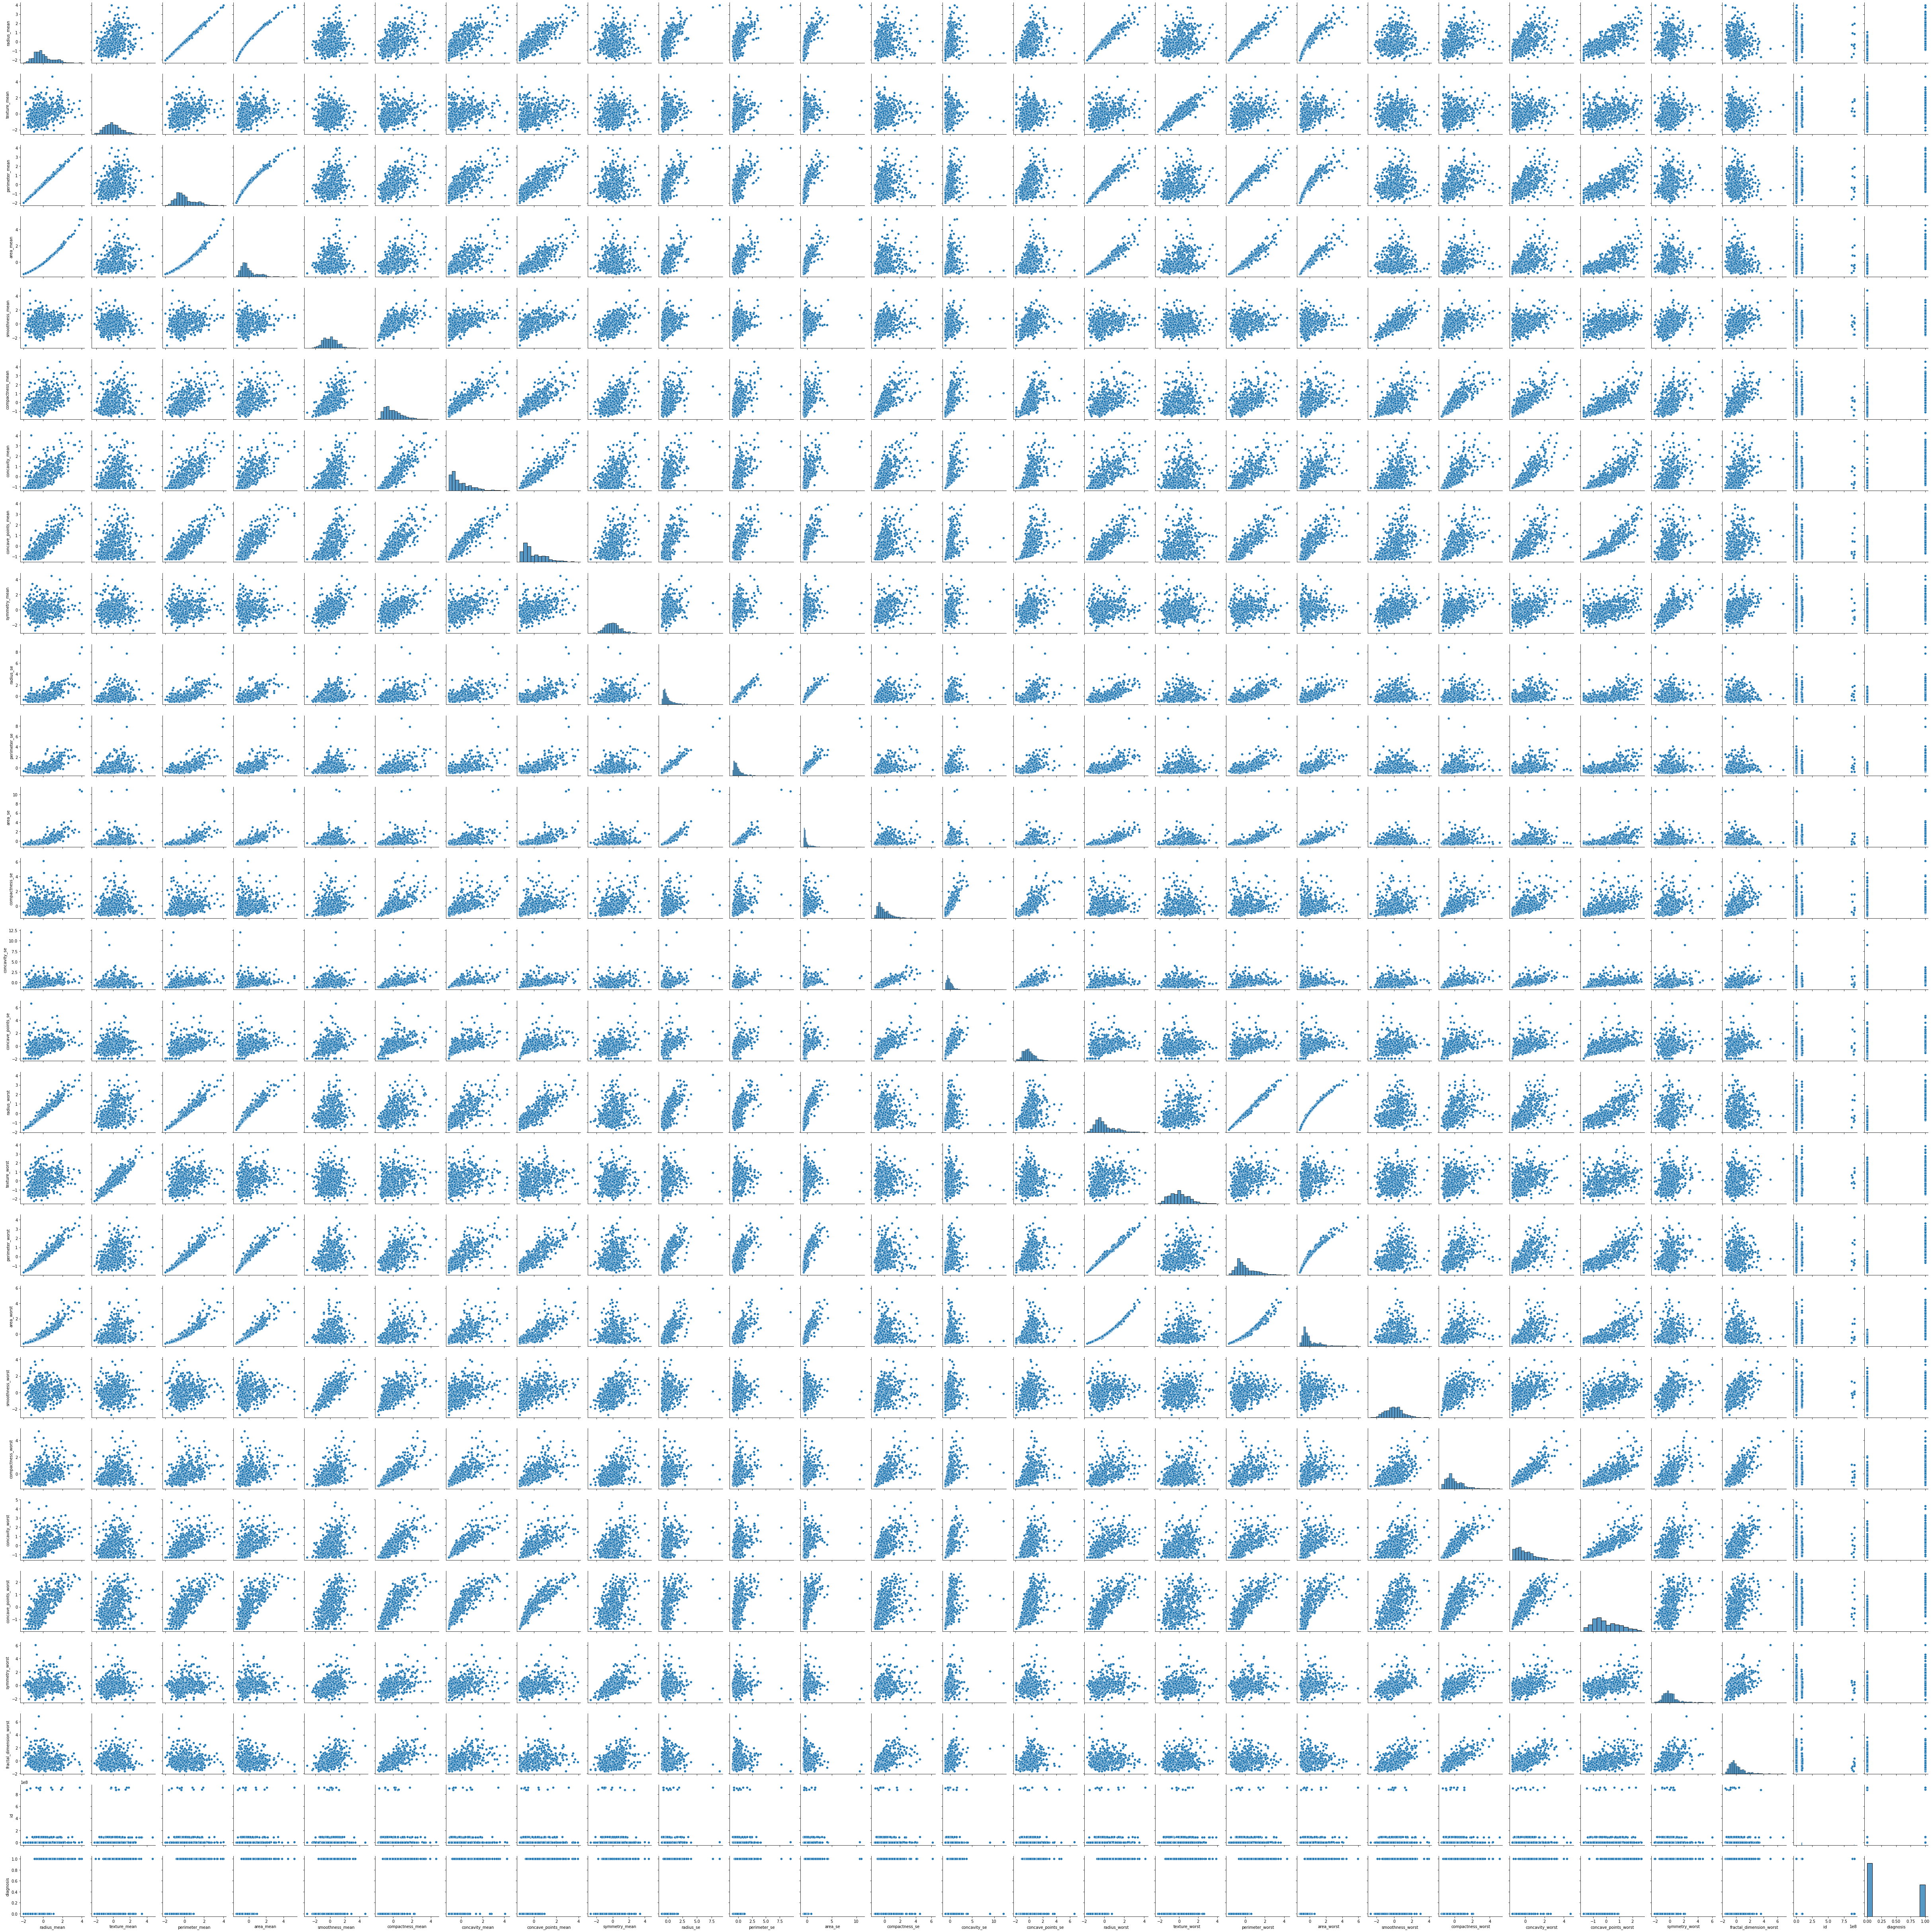

In [19]:
sns.pairplot(new_df, size=2.5)
plt.tight_layout()
plt.show()


# Save new data 


In [20]:
file_name = 'processed_data.csv'
new_df.to_csv('data/'+file_name, encoding='utf-8', index=False)


# Split the dataset into training-set and test-set (X_train, X_test)


In [21]:
X = new_df
y = new_df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=0)


# 1. Logistic Regression


In [22]:

# Initiating the model:
lr = LogisticRegression()


In [23]:
scores = cross_val_score(lr, X_train, y_train,
                         scoring='accuracy', cv=10).mean()

print("The mean accuracy with 10 fold cross validation is %s" %
      round(scores*100, 2))


The mean accuracy with 10 fold cross validation is 63.74


# 2. Decision Tree


In [24]:

dt = DecisionTreeClassifier()


In [25]:
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [26]:
# prediction
dt.score(X_test, y_test)


1.0

# 3. Random Forrest


In [27]:
for i in range(1, 21):
    rf = RandomForestClassifier(n_estimators=i)
    score = cross_val_score(rf, X_train, y_train,
                            scoring='accuracy', cv=10).mean()
    print("N = " + str(i) + " :: Score = " + str(round(score, 2)))


N = 1 :: Score = 0.97
N = 2 :: Score = 0.98
N = 3 :: Score = 0.99
N = 4 :: Score = 0.98
N = 5 :: Score = 0.99
N = 6 :: Score = 0.99
N = 7 :: Score = 0.98
N = 8 :: Score = 0.99
N = 9 :: Score = 1.0
N = 10 :: Score = 0.99
N = 11 :: Score = 1.0
N = 12 :: Score = 1.0
N = 13 :: Score = 0.99
N = 14 :: Score = 1.0
N = 15 :: Score = 1.0
N = 16 :: Score = 1.0
N = 17 :: Score = 1.0
N = 18 :: Score = 0.99
N = 19 :: Score = 1.0
N = 20 :: Score = 1.0


In [28]:

# Initiating the model:
rf = RandomForestClassifier(n_estimators=20)


In [29]:
scores = cross_val_score(rf, X_train, y_train,
                         scoring='accuracy', cv=10).mean()

print("The mean accuracy with 10 fold cross validation is %s" %
      round(scores*100, 2))


The mean accuracy with 10 fold cross validation is 100.0


# 4. Support Vector Machine


In [30]:

# Initiating the model:
svm = svm.SVC()


In [31]:
scores = cross_val_score(svm, X_train, y_train,
                         scoring='accuracy', cv=10).mean()

print("The mean accuracy with 10 fold cross validation is %s" %
      round(scores*100, 2))


The mean accuracy with 10 fold cross validation is 63.74


# 5. K Neighbors Classifier


In [32]:

# Initiating the model:
knn = KNeighborsClassifier()

scores = cross_val_score(knn, X_train, y_train,
                         scoring='accuracy', cv=10).mean()

print("The mean accuracy with 10 fold cross validation is %s" %
      round(scores*100, 2))


The mean accuracy with 10 fold cross validation is 66.58


In [33]:
# Performing Cross Validation
neighbors = []
cv_scores = []

# perform 10 fold cross validation
for k in range(1, 51, 2):
    neighbors.append(k)
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())


The optimal number of neighbors is  11 


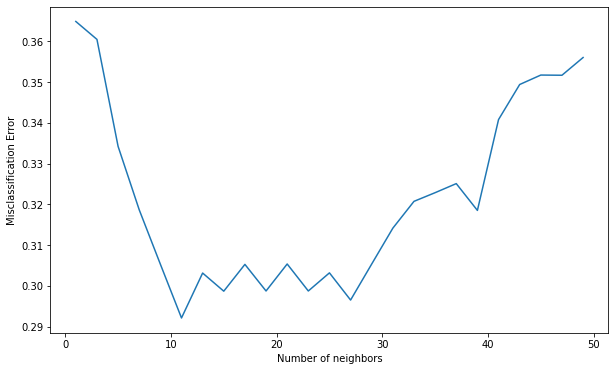

In [34]:
# Misclassification error versus k
MSE = [1-x for x in cv_scores]

# determining the best k
optimal_k = neighbors[MSE.index(min(MSE))]
print('The optimal number of neighbors is % d ' % optimal_k)

# plot misclassification error versus k
plt.figure(figsize=(10, 6))
plt.plot(neighbors, MSE)
plt.xlabel('Number of neighbors')
plt.ylabel('Misclassification Error')
plt.show()


Logisitic Regression, Random Forest, Decision Tree and KNN looks to perform better.
